# EfficientNet Visualiztion

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, auc

# ROC_AUC Curve 

In [57]:
df = pd.read_pickle("./net-EfficientNetFIA_traindb-ff-c23-720-140-140_face-scale_size-224_seed-41_last/ff-c23-720-140-140_test.pkl")

# print(df.columns)

d_label = df['label'].astype(int).to_numpy()
d_score = df["score"].to_numpy()
# d_value = df["loss"].to_numpy()
d_label

array([1, 1, 1, ..., 0, 0, 0])

In [58]:
fpr, tpr, threshold = roc_curve(d_label, d_score)
fpr, tpr, threshold = roc_curve(d_label, d_score)
roc_auc = auc(fpr, tpr)
print(fpr, tpr, threshold)

[0.        0.        0.        ... 0.9921875 0.9921875 1.       ] [0.00000000e+00 5.58035714e-05 1.04352679e-02 ... 9.99944196e-01
 1.00000000e+00 1.00000000e+00] [11.017159 10.017159  7.843343 ... -7.324969 -7.328496 -8.599046]


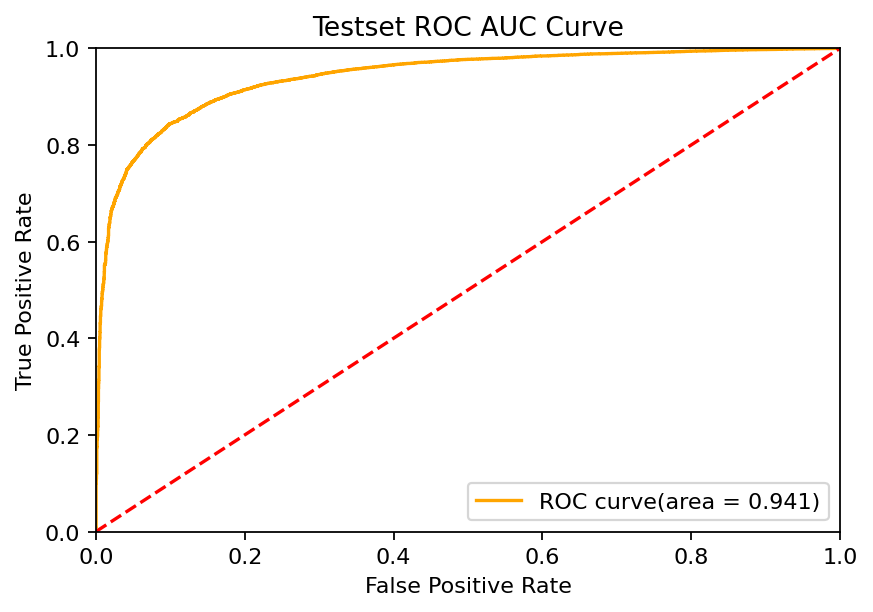

In [59]:
## Plot the result
plt.figure(dpi=160)
plt.title('Testset ROC AUC Curve')
plt.plot(fpr, tpr, color = 'orange', label = "ROC curve(area = %0.3f)" % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

# Precision

In [60]:
from sklearn.metrics import precision_recall_curve

In [61]:
precision, recall, thresholds = precision_recall_curve(d_label, d_score)
print(precision, recall, thresholds)

[0.80125196 0.80124307 0.8012789  ... 1.         1.         1.        ] [1.00000000e+00 9.99944196e-01 9.99944196e-01 ... 1.11607143e-04
 5.58035714e-05 0.00000000e+00] [-7.328496 -7.324969 -7.321704 ...  8.812148  8.900042 10.017159]


In [62]:
pr_auc = auc(recall, precision)
pr_auc

0.9838630570831318

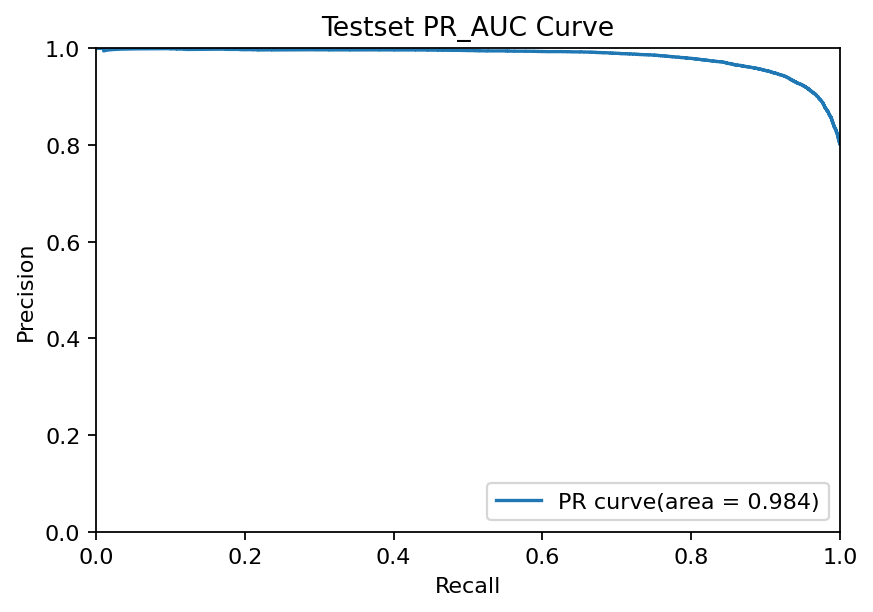

In [63]:
plt.figure(dpi=160)
plt.title('Testset PR_AUC Curve')
plt.plot(recall, precision, label = "PR curve(area = %0.3f)" % pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()    

In [64]:
import numpy as np
from sklearn import metrics
y = np.array([0, 0, 1, 1])
scores = np.array([-1, -1, 3, 3])
fpr, tpr, thresholds = metrics.roc_curve(y, scores)
print(fpr, tpr, thresholds)

[0. 0. 1.] [0. 1. 1.] [ 4  3 -1]
